In [1]:
import os, shutil
import numpy as np
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

In [3]:
original_dataset_dir = 'cats_vs_dogs/train'

dirs = []

base_dir = 'cats_vs_dogs_small'
dirs.append(base_dir)

train_dir = os.path.join(base_dir, 'train')
dirs.append(train_dir)
validation_dir = os.path.join(base_dir, 'validation')
dirs.append(validation_dir)
test_dir = os.path.join(base_dir, 'test')
dirs.append(test_dir)

train_cats_dir = os.path.join(train_dir, 'cats')
dirs.append(train_cats_dir)
train_dogs_dir = os.path.join(train_dir, 'dogs')
dirs.append(train_dogs_dir)

validation_cats_dir = os.path.join(validation_dir, 'cats')
dirs.append(validation_cats_dir)
validation_dogs_dir = os.path.join(validation_dir, 'dogs')
dirs.append(validation_dogs_dir)

test_cats_dir = os.path.join(test_dir, 'cats')
dirs.append(test_cats_dir)
test_dogs_dir = os.path.join(test_dir, 'dogs')
dirs.append(test_dogs_dir)

for directory in dirs:
    if not os.path.exists(directory):
        os.mkdir(directory)

In [8]:
fnames = ["cat.{}.jpg".format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dest = os.path.join(train_cats_dir, fname)
    shutil.copy(src, dest)
    
fnames = ["cat.{}.jpg".format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dest = os.path.join(validation_cats_dir, fname)
    shutil.copy(src, dest)
    
fnames = ["cat.{}.jpg".format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dest = os.path.join(test_cats_dir, fname)
    shutil.copy(src, dest)
    
fnames = ["dog.{}.jpg".format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dest = os.path.join(train_dogs_dir, fname)
    shutil.copy(src, dest)
    
fnames = ["dog.{}.jpg".format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dest = os.path.join(validation_dogs_dir, fname)
    shutil.copy(src, dest)
    
fnames = ["dog.{}.jpg".format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dest = os.path.join(test_dogs_dir, fname)
    shutil.copy(src, dest)

for directory in dirs:
    print(directory, ': ', len(os.listdir(directory)))
    
print('Done!')

cats_vs_dogs_small :  3
cats_vs_dogs_small\train :  2
cats_vs_dogs_small\validation :  2
cats_vs_dogs_small\test :  2
cats_vs_dogs_small\train\cats :  1000
cats_vs_dogs_small\train\dogs :  1000
cats_vs_dogs_small\validation\cats :  500
cats_vs_dogs_small\validation\dogs :  500
cats_vs_dogs_small\test\cats :  500
cats_vs_dogs_small\test\dogs :  500
Done!


In [47]:
from keras import models
from keras import layers
from keras import losses
from keras import optimizers
from keras import metrics

In [53]:
model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3))) # 3 because color images
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid')) # 1 and sigmoid because binary output

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_41 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_37 (MaxPooling (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_42 (Conv2D)           (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_38 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_43 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_39 (MaxPooling (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_44 (Conv2D)           (None, 15, 15, 128)       147584    
__________

In [54]:
model.compile(
    optimizer=optimizers.RMSprop(lr=1e-4),
    loss=losses.binary_crossentropy,
    metrics=['accuracy']
)

In [55]:
from keras.preprocessing.image import ImageDataGenerator

In [56]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
) # data augmentation by randomly applying modifications to image

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150,150),
    batch_size=32,
    class_mode='binary'
)

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150,150),
    batch_size=32,
    class_mode='binary'
)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [57]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=100,
    validation_data=validation_generator,
    validation_steps=50
)

Epoch 1/10
100/100 [==============================] - 209s 2s/step - loss: 0.6903 - acc: 0.5219 - val_loss: 0.6718 - val_acc: 0.5717
Epoch 2/10
100/100 [==============================] - 207s 2s/step - loss: 0.6760 - acc: 0.5525 - val_loss: 0.6666 - val_acc: 0.5704
Epoch 3/10
100/100 [==============================] - 207s 2s/step - loss: 0.6646 - acc: 0.5778 - val_loss: 0.6404 - val_acc: 0.6123
Epoch 4/10
100/100 [==============================] - 211s 2s/step - loss: 0.6522 - acc: 0.6031 - val_loss: 0.6429 - val_acc: 0.6085
Epoch 5/10
100/100 [==============================] - 213s 2s/step - loss: 0.6337 - acc: 0.6281 - val_loss: 0.6251 - val_acc: 0.6244
Epoch 6/10
 17/100 [====>.........................] - ETA: 2:35 - loss: 0.6195 - acc: 0.6176

KeyboardInterrupt: 

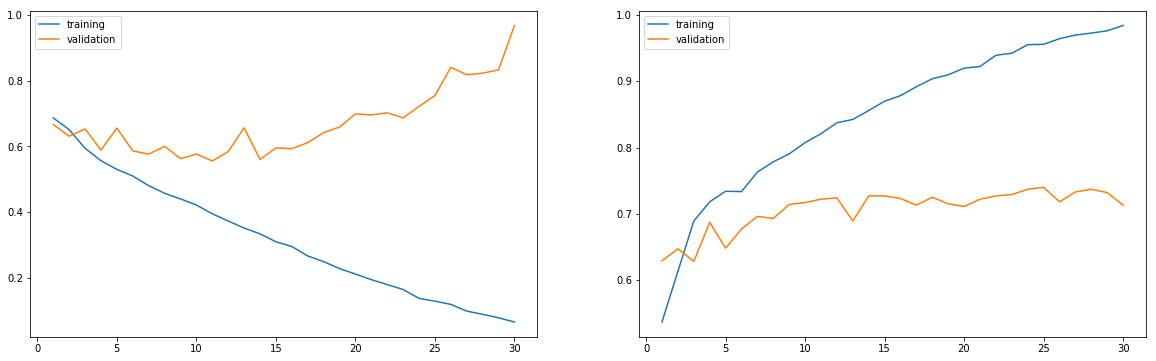

In [41]:
history_dict = history.history

loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)

acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']
epochs = range(1, len(acc_values) + 1)

plt.figure(figsize=(20,6))
plt.subplot(1, 2, 1)
plt.plot(epochs, loss_values)
plt.plot(epochs, val_loss_values)
plt.legend(['training', 'validation'])

plt.subplot(1, 2, 2)
plt.plot(epochs, acc_values)
plt.plot(epochs, val_acc_values)
plt.legend(['training', 'validation'])

In [42]:
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150,150),
    batch_size=20,
    class_mode='binary'
)

Found 1000 images belonging to 2 classes.


In [44]:
test_loss, test_acc = model.evaluate_generator(test_generator)
print(test_loss, test_acc)

0.87992472291 0.746000000238


KeyError: 'epoch'

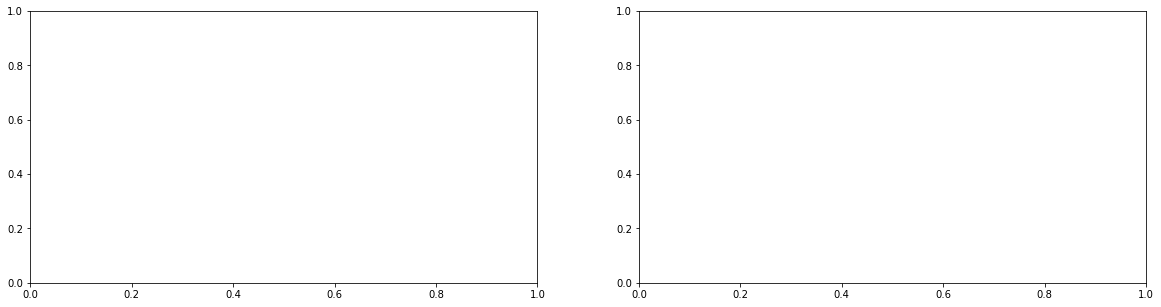

In [58]:
model_title = "TITLE"
def plot_hist(history_dict):
   fig = plt.figure(figsize=(5,4))
   f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 5),sharey=False)
   
   ax1.plot(history_dict['epoch'],  history_dict['history']['loss'],label="Train")
   ax1.plot(history_dict['epoch'],  history_dict['history']['val_loss'],label="CV")
   ax1.set_title("Loss function development - Training set vs CV set")
   ax1.legend(loc='upper right')
   ax1.set_xlabel('Epochs')
   ax1.set_ylabel('Values')
   
   ax2.plot(history_dict['epoch'],  history_dict['history']['acc'],label="Train")
   ax2.plot(history_dict['epoch'],  history_dict['history']['val_acc'],label="CV")
   ax2.set_title("Accuracy development - Training set vs CV set")
   ax2.legend(loc='upper right')
   ax2.set_xlabel('Epochs')
   ax2.set_ylabel('Values')
   
   plt.suptitle(model_title, fontsize=16)
   
   plt.show()

plot_hist(history_dict)